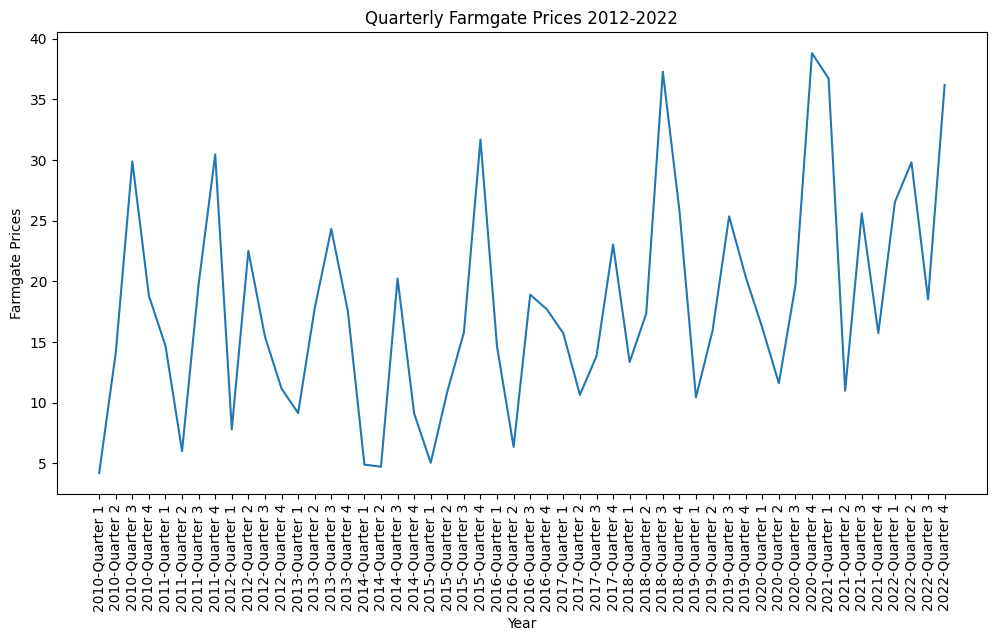

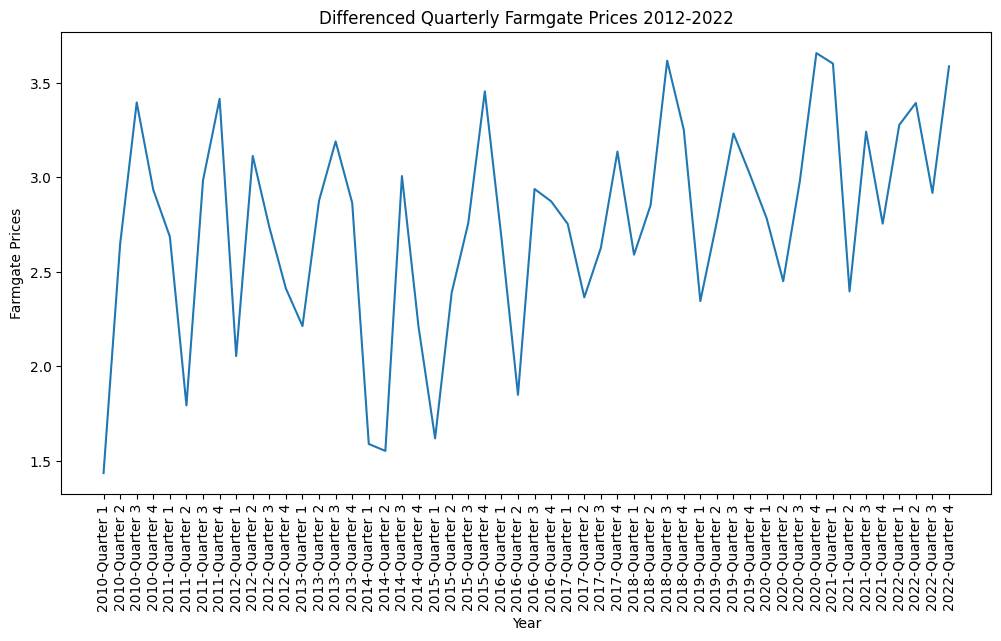

First ADF Test:
ADF Statistic: -5.605328440552646
p-value: 1.2379849939970676e-06
Critical Values:
1%:-3.639224104416853
5%:-2.9512301791166293
10%:-2.614446989619377

Second ADF Test(after differencing):
ADF Statistic: -6.508284172511371
p-value: 1.1168618050833787e-08
Critical Values:
1%:-3.653519805908203
5%:-2.9572185644531253
10%:-2.6175881640625
                               SARIMAX Results                                
Dep. Variable:     FarmgatePrices_log   No. Observations:                   36
Model:                 ARIMA(4, 1, 0)   Log Likelihood                 -26.523
Date:                Tue, 20 Jun 2023   AIC                             63.045
Time:                        19:08:45   BIC                             70.822
Sample:                             0   HQIC                            65.730
                                 - 36                                         
Covariance Type:                  opg                                         
              

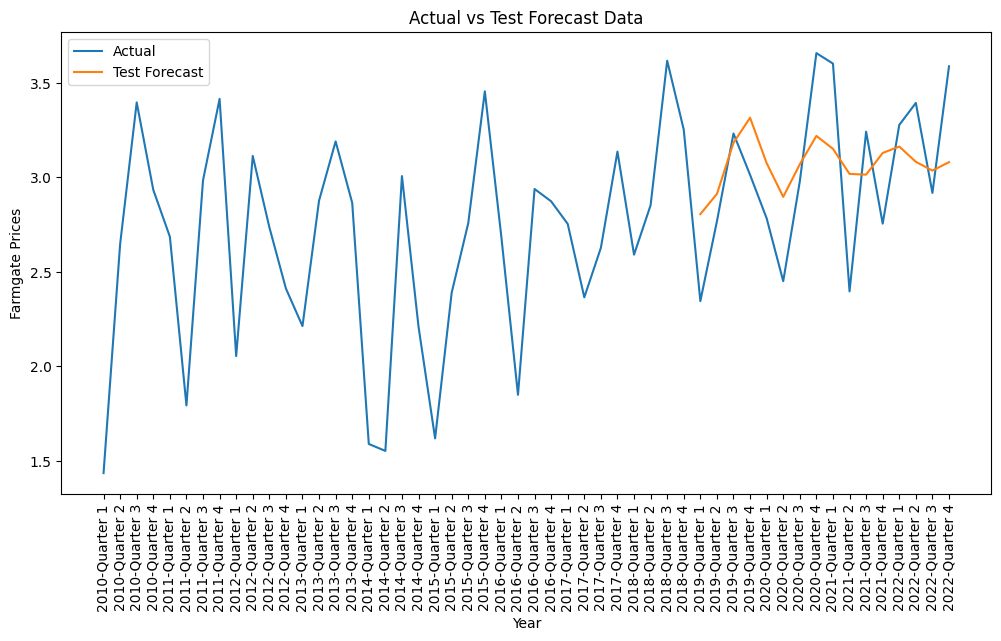


Mean Absolute Error (MAE): 0.30947349158756593
Mean Absolute Percentage Error (MAPE): 0.10631159334335567
Root Mean Squared Error (RMSE): 0.3514033001537589

Enter the number of years ahead to predict: 12

Predicted Future Data
    Year  TimePeriod  Prediction
36  2023           1   16.405130
37  2023           2   20.574540
38  2023           3   25.786549
39  2023           4   28.128444
40  2024           1   22.607642
41  2024           2   19.615186
42  2024           3   23.619522
43  2024           4   26.006832
44  2025           1   24.392263
45  2025           2   22.023235
46  2025           3   22.293596
47  2025           4   24.409200
48  2026           1   24.672943
49  2026           2   23.215017
50  2026           3   22.637846
51  2026           4   23.471095
52  2027           1   24.196067
53  2027           2   23.787339
54  2027           3   23.111780
55  2027           4   23.231647
56  2028           1   23.756141
57  2028           2   23.827426
58  2028    

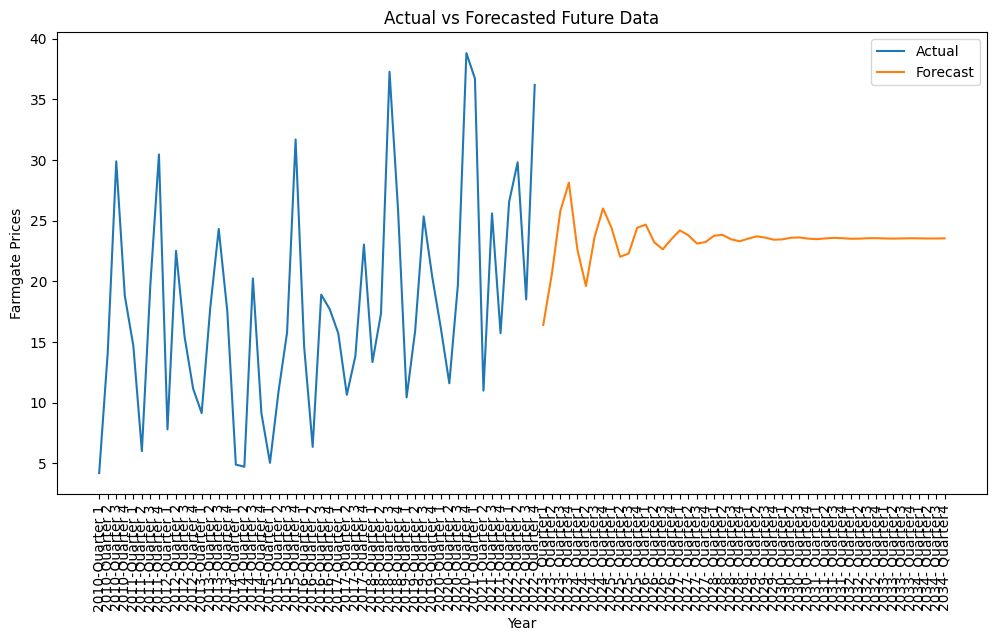

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Load the data
data = pd.read_csv('csv/FarmgatePrices.csv')

# Convert 'Year' column to string type
data['Year'] = data['Year'].astype(str)
# Create a new column combining 'Year' and 'TimePeriod'
data['YearQuarter'] = data['Year'] + '-' + data['TimePeriod']

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['YearQuarter'], data['FarmgatePrices'])
plt.xlabel('Year')
plt.ylabel('Farmgate Prices')
plt.title('Quarterly Farmgate Prices 2012-2022')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

# Take the logarithm of the 'AreaHarvested' column
data['FarmgatePrices_log'] = np.log(data['FarmgatePrices'])

# Plot the logarithm of the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['YearQuarter'], data['FarmgatePrices_log'])
plt.xlabel('Year')
plt.ylabel('Farmgate Prices')
plt.title('Differenced Quarterly Farmgate Prices 2012-2022')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

train_data = data['FarmgatePrices_log'].iloc[:int(len(data) * 0.7)]

# Step 2: Check for stationarity and determine ARIMA model parameters

# Perform the ADF test
print('First ADF Test:')
result = adfuller(train_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}:{value}')
    
# Difference time series data for stationarity
train_data_diff = train_data.diff().dropna()

# Perform the ADF test
print('\nSecond ADF Test(after differencing):')
result = adfuller(train_data_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}:{value}')

# Step 3: Fit the ARIMA model
model = ARIMA(train_data, order=(4, 1, 0))
model_fit = model.fit()

print(model_fit.summary())

# Step 4: Make time series predictions
test_data = data['FarmgatePrices_log'].iloc[int(len(data) * 0.7):]
forecast = model_fit.forecast(steps=len(test_data))

# Step 6: Combine actual and forecasted data for plotting
combined_data = pd.concat([data[['YearQuarter', 'FarmgatePrices_log']], pd.Series(forecast)], axis=1)
combined_data.columns = ['Year', 'Actual', 'Forecast']

# Plot the actual and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Year'], combined_data['Actual'], label='Actual')
plt.plot(combined_data['Year'], combined_data['Forecast'], label='Test Forecast')
plt.xlabel('Year')
plt.ylabel('Farmgate Prices')
plt.title('Actual vs Test Forecast Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()

# Step 5: Evaluate model predictions
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(test_data, forecast)
mape = mean_absolute_percentage_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print('\nMean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Root Mean Squared Error (RMSE):', rmse)

# Make actual predictions
# User input for prediction
num_years = int(input('\nEnter the number of years ahead to predict: '))

# Fit the ARIMA model using the actual series
train_data = data['FarmgatePrices'].iloc[:int(len(data) * 0.7)]
model = ARIMA(train_data, order=(4, 1, 0))
model_fit = model.fit()

# Step 7: Make actual predictions on future data
last_year = int(data['Year'].iloc[-1])
last_year = last_year + 1
future_years = pd.date_range(start=f'{last_year}-01-01', periods=num_years * 4, freq='Q')
future_forecast = pd.Series(model_fit.forecast(steps=num_years * 4))

# Create the prediction DataFrame
prediction_df = pd.DataFrame({'Year': future_years.year, 'TimePeriod': future_years.quarter, 'Prediction': future_forecast})

# Print the prediction
print('\nPredicted Future Data')
print(prediction_df)

# Step 8: Plot forecasted data
plt.figure(figsize=(12, 6))
plt.plot(data['YearQuarter'], data['FarmgatePrices'], label='Actual')
plt.plot(prediction_df['Year'].astype(str) + '- Quarter' + prediction_df['TimePeriod'].astype(str), prediction_df['Prediction'], label='Forecast')
plt.xlabel('Year')
plt.ylabel('Farmgate Prices')
plt.title('Actual vs Forecasted Future Data')
plt.xticks(rotation=90)
plt.legend()
plt.show()
